# Ancestry analysis
### 1. eGene upsetR

In [1]:
library(tidyverse)
library(data.table)
library(UpSetR)
# library(deming)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [28]:
# all <- fread("../results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
eur <- fread("../results/eur_perm_50HCP/sig_pheno.txt", data.table = F)
amr <- fread("../results/amr_perm_15HCP/sig_pheno.txt", data.table = F)
afr <- fread("../results/afr_perm_25HCP/sig_pheno.txt", data.table = F)

In [3]:
genes <- list(ALL = unique(all$pid),
              EUR = unique(eur$pid),
              AMR = unique(amr$pid),
              AFR = unique(afr$pid))

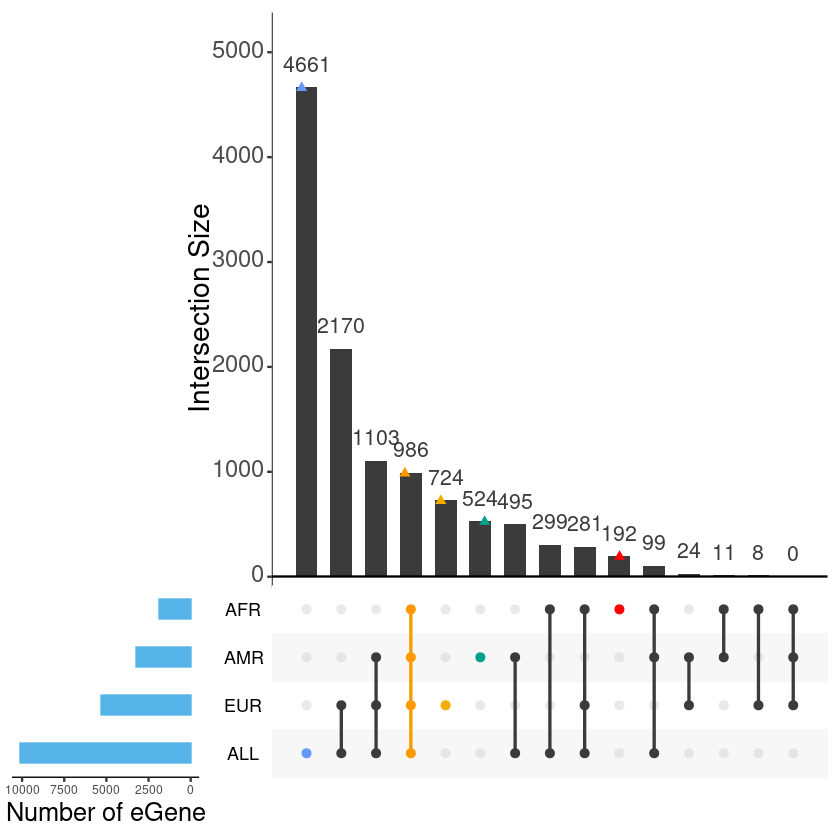

In [11]:
upset(fromList(genes), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of eGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "#FF9900", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "#FF0000", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "#00A08A", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "#F2AD00", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "#6699FF", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [10]:
pdf(file = "../figures/upsetr_egene.pdf", onefile = F)

upset(fromList(genes), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of eGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "#FF9900", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "#FF0000", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "#00A08A", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "#F2AD00", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "#6699FF", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

### 2: Effect size
I first tried this, y axis does not have to be significant
- `Snakefile` `make_effect_size_scatter_eur_amr`, `eur_afr`, `afr_amr`: all nominal associations

Then this. There are reversed effect sizes/off-diagonal points
- `Snakefile` `scatter_eur_afr`, `eur_amr`, `afr_amr`: x-axis pop1 permutation eGene-eQTL, y-axis colored by nominally sig and non-sig

Calculated aFC for eur, amr, afr nominal eQTL. A few permutation eQTL are not nominally significant, exclude these.
- reverse effect size variants have swapped REF/ALT between populations. `*(-1)` for these
- some variants are near y-axis. Checked one example, small MAC. But somehow they don't show up on beta scatter plot? Remove these

In [27]:
eur_afc_sig <- fread("../results/eur_nominal_50HCP/aFC_boot100.txt", data.table = F)
eur_afc_all <- fread("../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC_boot100.txt", data.table = F)
amr_afc <- fread("../results/amr_nominal_15HCP/aFC_boot100.txt", data.table = F)
afr_afc <- fread("../results/afr_nominal_25HCP/aFC_boot100.txt", data.table = F)

In [4]:
# eur_afc_sig <- eur_afc_sig %>% filter(pid != "pid")
# eur_afc_all <- eur_afc_all %>% filter(pid != "pid")
# amr_afc <- amr_afc %>% filter(pid != "pid")
# afr_afc <- afr_afc %>% filter(pid != "pid")
# write.table(eur_afc_sig, "../results/eur_nominal_50HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(eur_afc_all, "../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(amr_afc, "../results/amr_nominal_15HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(afr_afc, "../results/afr_nominal_25HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")

### 2-1: AMR-EUR

In [29]:
amr <- amr %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [30]:
amr_afc <- amr_afc %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [31]:
sum(unique(amr$gene_qtl) %in% unique(amr_afc$gene_qtl))
length(unique(amr$gene_qtl)) # not all perm gene_qtl is nominally sig?

[1] 3236

[1] 3242

In [32]:
# keep permutation egene-eQTL pairs only
amr_afc <- amr_afc %>% filter(gene_qtl %in% amr$gene_qtl)
dim(amr_afc)

[1] 3236   12

In [33]:
eur_afc_all <- eur_afc_all %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [34]:
dim(eur_afc_all)

[1] 3933    8

In [35]:
# keep gene-eQTL pairs that are AMR permutation sig
eur_afc_all_amr <- eur_afc_all %>% filter(gene_qtl %in% amr_afc$gene_qtl)
dim(eur_afc_all_amr)

[1] 2729    8

In [36]:
eur_afc_sig <- eur_afc_sig %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)
sum(eur_afc_sig$gene_qtl %in% eur_afc_all_amr$gene_qtl)

[1] 1663

In [37]:
eur_afc_all_amr <- eur_afc_all_amr %>% mutate(sig = ifelse(gene_qtl %in% eur_afc_sig$gene_qtl,
                                                           "EUR nominal eQTL", "EUR non-significant"))

In [38]:
head(eur_afc_all_amr)
table(eur_afc_all_amr$sig)

,gene_qtl,pid,sid,sid_chr,sid_pos,log2_aFC,log2_aFC_lower,log2_aFC_upper,sig
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636,1,169807621,-0.25445216,-0.29937762,-0.17135050,EUR nominal eQTL
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213,1,24741819,-1.05536798,-1.40243569,-0.81121994,EUR nominal eQTL
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567,1,24711120,-0.18325745,-0.24763059,-0.10400362,EUR nominal eQTL
4,ENSG00000011009:rs72655556,ENSG00000011009,rs72655556,1,23217443,-0.03651043,-0.22019587,0.08392405,EUR non-significant
5,ENSG00000033122:rs4650137,ENSG00000033122,rs4650137,1,69685100,-0.09780169,-0.13436798,-0.05906543,EUR nominal eQTL
6,ENSG00000041988:chr1:6610579,ENSG00000041988,chr1:6610579,1,6670639,0.01645603,-0.02992298,0.06722265,EUR non-significant



   EUR nominal eQTL EUR non-significant 
               1663                1066 

In [41]:
amr_eur <- amr_afc %>% 
select(gene_qtl, pid, sid, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>%
inner_join(eur_afc_all_amr, by = "gene_qtl") %>%
select(gene_qtl, pid.x, sid.x, log2_aFC.x, log2_aFC_lower.x, log2_aFC_upper.x, 
                              log2_aFC.y, log2_aFC_lower.y, log2_aFC_upper.y, sig)

In [42]:
dim(amr_eur)

[1] 2729   10

In [43]:
cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
amr_eur[cols.num] <- sapply(amr_eur[cols.num],as.numeric)

In [44]:
cols <- c("EUR nominal eQTL" = "#00A08A",
          "EUR non-significant" = "#C5FCEE")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 29 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


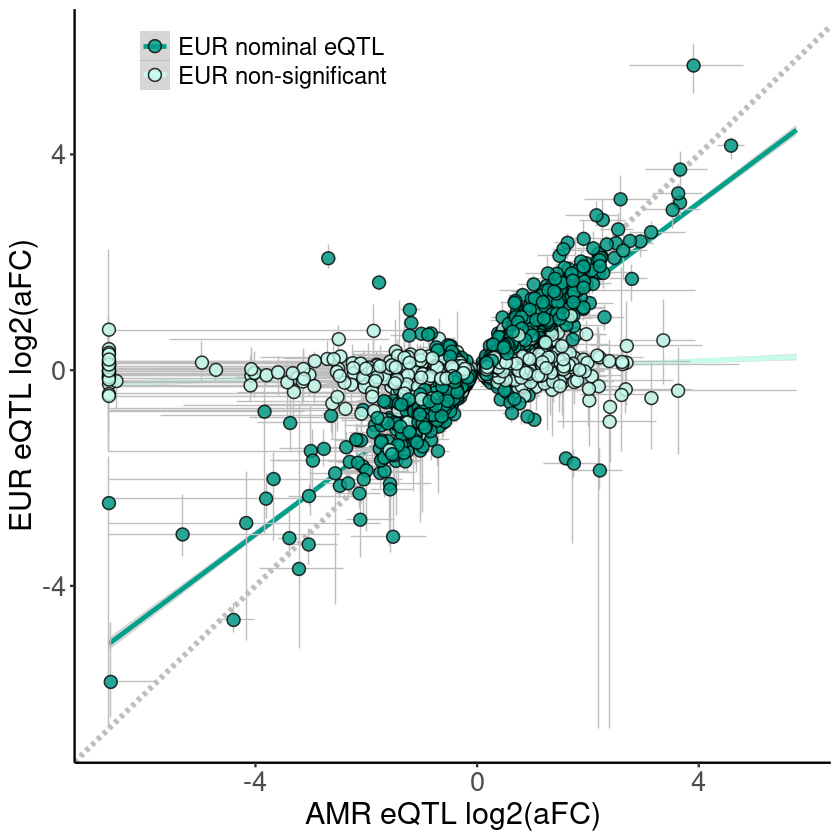

In [45]:
ggplot(amr_eur, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [40]:
ggsave("../figures/aFC_amr_eur.pdf", width = 6, height = 6)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 29 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


In [28]:
cor.test(x = amr_eur$log2_aFC.x, y = amr_eur$log2_aFC.y, method = 'spearman') # this is not restricting to EUR nom sig 

Warning message in cor.test.default(x = amr_eur$log2_aFC.x, y = amr_eur$log2_aFC.y, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  amr_eur$log2_aFC.x and amr_eur$log2_aFC.y
S = 798501194, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7642692 


In [46]:
head(amr_eur)

,gene_qtl,pid.x,sid.x,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000272438:rs61769717,ENSG00000272438,rs61769717,0.6334069,0.4391346,0.8214064,0.41410685,0.26259194,0.55856935,EUR nominal eQTL
2,ENSG00000230699:rs61769717,ENSG00000230699,rs61769717,0.7455732,0.4833001,0.9368429,0.55541610,0.40213786,0.69706018,EUR nominal eQTL
3,ENSG00000217801:rs3813193,ENSG00000217801,rs3813193,0.8512290,0.6679700,0.9712718,0.37343057,0.20501898,0.55611407,EUR non-significant
4,ENSG00000131591:chr1:1094425,ENSG00000131591,chr1:1094425,-0.3325752,-0.4021713,-0.2483359,-0.17406770,-0.30550417,-0.10935300,EUR nominal eQTL
5,ENSG00000176022:rs111614456,ENSG00000176022,rs111614456,-0.4766200,-0.5980982,-0.3991216,-0.38939210,-0.45091010,-0.33342093,EUR nominal eQTL
6,ENSG00000221978:rs116579103,ENSG00000221978,rs116579103,0.4695129,0.3370949,0.6037550,-0.02065644,-0.08420039,0.03797308,EUR non-significant


### 2-1-1: Investigate the points near y axis
- have low MAC. Keep only variants that pass MAC>10 in both EUR and AMR

In [52]:
test <- amr_eur %>% filter(log2_aFC.x < -6, sig == "EUR non-significant")
head(test)

,gene_qtl,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000121454:rs902169365,-6.643856,-6.643856,-6.643856,0.75062314,-0.1390696,2.2412609,EUR non-significant
2,ENSG00000060718:rs78245241,-6.643856,-6.643856,-6.643856,-0.08927556,-0.3837025,0.2019564,EUR non-significant
3,ENSG00000270562:rs116695663,-6.643856,-6.643856,-6.643856,-0.11285620,-0.4733802,0.2202849,EUR non-significant
4,ENSG00000251244:chr4:155818872,-6.643856,-6.643856,-6.643856,-0.13977139,-0.7237100,0.2610060,EUR non-significant
5,ENSG00000286599:rs74903752,-6.643856,-6.643856,-6.643856,0.10903218,-0.3536229,0.5546544,EUR non-significant
6,ENSG00000170549:rs75455885,-6.643856,-6.643856,-6.643856,-0.25947120,-0.6080685,0.1074340,EUR non-significant


**Do they also have near y-axis betas?**

In [56]:
# need beta for eur non sig
# test <- test %>% left_join(amr, by = "gene_qtl") %>% left_join(eur_afc_sig, by = "gene_qtl")

In [58]:
# ggplot(test, aes(x = slope.x, y = slope.y)) +
# geom_point() +
# labs(x = "AMR slope", y = "EUR slope")

In [57]:
# ggplot(reverse, aes(x = log2_aFC.x, y = log2_aFC.y)) +
# geom_point() +
# labs(x = "AMR log2aFC", y = "EUR log2aFC")

**Load gene expression and dosage**
- extracted variant dosage

In [2]:
eur_expr <- fread("../data/eur/genes.280.bed.gz", data.table = F)
amr_expr <- fread("../data/amr/genes.162.bed.gz", data.table = F)

In [73]:
# eur_dosage <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz",
#                    data.table = F)

In [74]:
# amr_dosage <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz",
#                    data.table = F)

In [3]:
eur_expr_ENSG00000121454 <- eur_expr %>% filter(ID == "ENSG00000121454")
amr_expr_ENSG00000121454 <- amr_expr %>% filter(ID == "ENSG00000121454")

In [4]:
eur_dosage_rs902169365 <- read.table("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/rs902169365_dose.tsv", check.names = F, header = T)
amr_dosage_rs902169365 <- read.table("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/rs902169365_dose.tsv", check.names = F, header = T)

In [6]:
df <- data.frame("ENSG00000121454 expr, no cov" = c(as.numeric(eur_expr_ENSG00000121454[1,5:ncol(eur_expr_ENSG00000121454)]),
                                                    as.numeric(amr_expr_ENSG00000121454[1,5:ncol(amr_expr_ENSG00000121454)])),
                "Population" = c(rep("EUR", 280), rep("AMR", 162)),
                "rs902169365" = c(as.numeric(eur_dosage_rs902169365[1, 5:ncol(eur_dosage_rs902169365)]),
                                  as.numeric(amr_dosage_rs902169365[1, 5:ncol(amr_dosage_rs902169365)])))

In [8]:
table(df$Population, df$rs902169365)

     
        0   1
  AMR 155   7
  EUR 273   7

In [33]:
2*(280+162)
7/(162*2)
7/(280*2)


[1] 884

[1] 0.02160494

[1] 0.0125

In [10]:
14/884

[1] 0.0158371

In [11]:
df$rs902169365 <- as.factor(df$rs902169365)

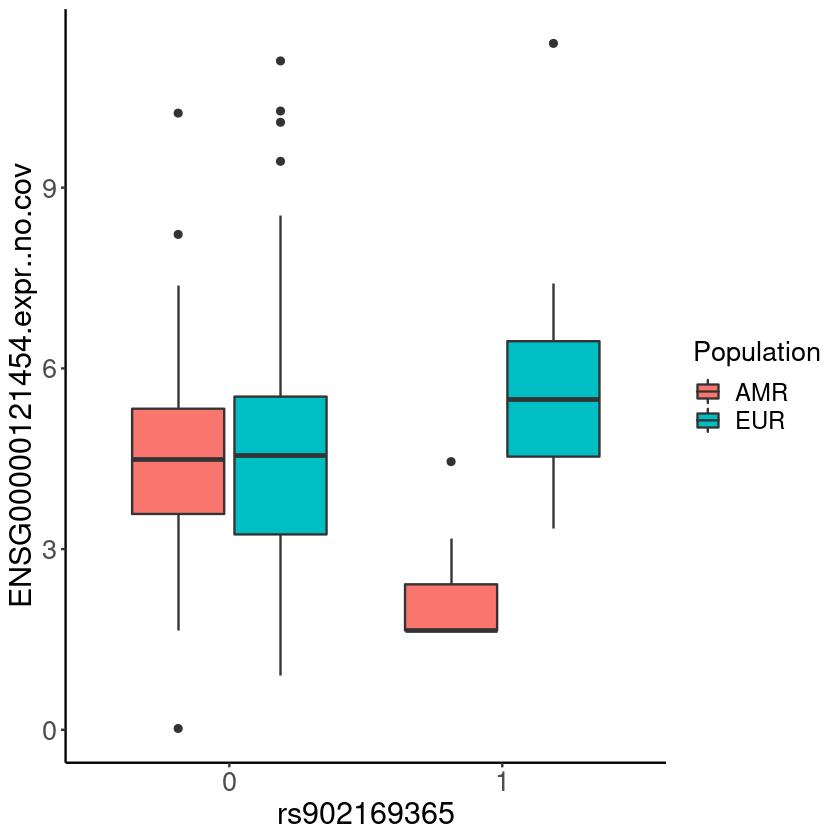

In [13]:
ggplot(df, aes(x = rs902169365, y = ENSG00000121454.expr..no.cov, fill = Population)) +
geom_boxplot() +
theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16))

**Regress expression by covariates**

In [16]:
amr_cov <- read.table("../data/amr/15HCP_cov_final.txt", header = T, check.names = F)
eur_cov <- read.table("../data/eur/50HCP_cov_final.txt", header = T, check.names = F)

In [18]:
amr_cov[amr_cov=="F"] <- 0
eur_cov[eur_cov=="F"] <- 0

amr_cov[amr_cov=="M"] <- 1
eur_cov[eur_cov=="M"] <- 1

In [23]:
amr_cov <- amr_cov[,-1]
eur_cov <- eur_cov[,-1]

In [25]:
amr_cov <- t(amr_cov)
amr_cov <- cbind(1, amr_cov)
storage.mode(amr_cov) <- "numeric"

Y <- as.matrix(amr_expr_ENSG00000121454[1,5:ncol(amr_expr_ENSG00000121454)])
X <- as.matrix(amr_cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
amr_cov_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [26]:
eur_cov <- t(eur_cov)
eur_cov <- cbind(1, eur_cov)
storage.mode(eur_cov) <- "numeric"

Y <- as.matrix(eur_expr_ENSG00000121454[1,5:ncol(eur_expr_ENSG00000121454)])
X <- as.matrix(eur_cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
eur_cov_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [27]:
head(eur_cov_regressed)

,898,1038,1046,1102,1107,1110,1111,1115,1117,1118,...,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
1,4.663353,5.150385,4.673256,5.070408,4.647961,4.899528,4.429174,5.289875,4.569176,5.090152,...,4.914374,3.901043,4.56636,6.939285,6.391932,4.083027,4.662693,6.023785,3.67365,4.763226


In [28]:
head(eur_dosage_rs902169365)

,CHROM,POS,REF,ALT,898,1038,1046,1102,1107,1110,...,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,180248209,CCTTTT,C,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df <- data.frame("ENSG00000121454 regressed expr" = c(as.numeric(eur_cov_regressed[1,]),
                                                      as.numeric(amr_cov_regressed[1,])),
                "Population" = c(rep("EUR", 280), rep("AMR", 162)),
                "rs902169365" = c(as.numeric(eur_dosage_rs902169365[1, 5:ncol(eur_dosage_rs902169365)]),
                                  as.numeric(amr_dosage_rs902169365[1, 5:ncol(amr_dosage_rs902169365)])))
df$rs902169365 <- as.factor(df$rs902169365)

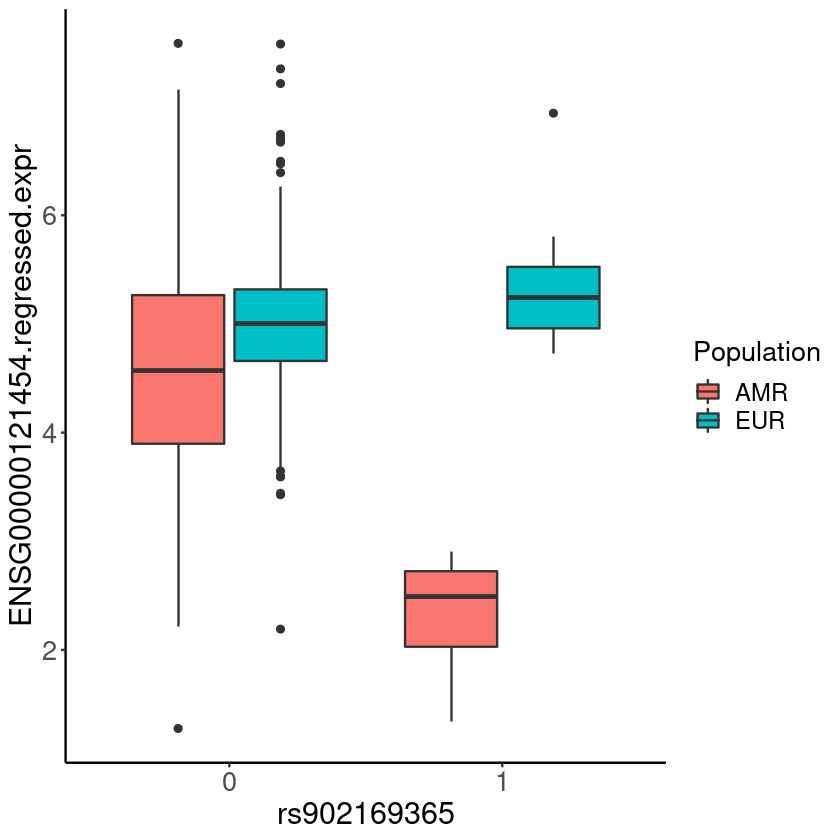

In [31]:
ggplot(df, aes(x = rs902169365, y = ENSG00000121454.regressed.expr, fill = Population)) +
geom_boxplot() +
theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16))

**Remove low MAC variants**
- keep only variants with MAC>10 in both EUR and AMR

In [47]:
eur_mac_10 <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.removeGeneOutlier.mac10.bim", data.table = F)

In [48]:
amr_mac_10 <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.removeGeneOutlier.mac10.bim", data.table = F)

In [60]:
eur_amr_mac_10 <- eur_mac_10 %>% inner_join(amr_mac_10, by = "V2")
dim(eur_amr_mac_10)

[1] 4787693      11

In [61]:
length(unique(amr_eur$sid.x))
sum(unique(amr_eur$sid.x) %in% eur_amr_mac_10$V2)

[1] 2620

[1] 2327

In [62]:
amr_eur_mac_10 <- amr_eur %>% filter(sid.x %in% eur_amr_mac_10$V2)

`geom_smooth()` using formula 'y ~ x'



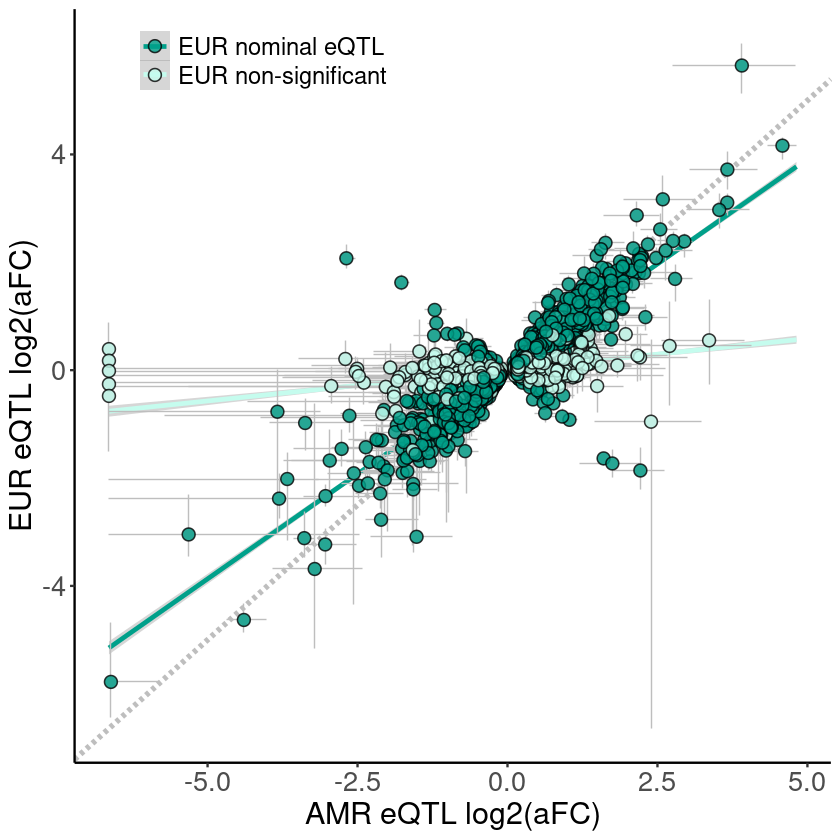

In [63]:
ggplot(amr_eur_mac_10, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [64]:
amr_eur_mac_10 %>% filter(log2_aFC.x < -6)

gene_qtl,pid.x,sid.x,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000170549:rs75455885,ENSG00000170549,rs75455885,-6.643856,-6.643856,-6.643856,-0.25947120,-0.60806848,0.10743401,EUR non-significant
ENSG00000008197:rs17665639,ENSG00000008197,rs17665639,-6.643856,-6.643856,-6.643856,0.39009463,0.03051849,0.87759801,EUR non-significant
ENSG00000137573:rs62512190,ENSG00000137573,rs62512190,-6.643856,-6.643856,-6.643856,0.17553229,-0.15277599,0.52637073,EUR non-significant
ENSG00000272679:rs77672405,ENSG00000272679,rs77672405,-6.643856,-6.643856,-6.643856,-0.47743066,-1.50180142,0.06471152,EUR non-significant
ENSG00000257069:rs113767925,ENSG00000257069,rs113767925,-6.643856,-6.643856,-6.643856,-0.01367548,-0.32803508,0.24542674,EUR non-significant
ENSG00000214425:rs2732666,ENSG00000214425,rs2732666,-6.611287,-6.643856,-5.796610,-5.78020419,-6.44799327,-4.68710040,EUR nominal eQTL


### 2-1-2: Reverse effect points

In [21]:
# do the reverse log2aFC QTLs also having reverse beta?
# note here EUR aFC CIs are slightly different than those in eur_afc_all 
reverse <- amr_eur %>% filter(log2_aFC.x * log2_aFC.y < 0, sig == "EUR nominal eQTL")
reverse <- reverse %>% left_join(amr, by = "gene_qtl") %>% left_join(eur_afc_sig, by = "gene_qtl")
head(reverse)

,gene_qtl,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig,pid,nvar,...,pval_nominal_threshold,dist.y,npval.y,slope.y,fdr,sid_chr,sid_pos,log2_aFC,log2_aFC_lower,log2_aFC_upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000049239:chr1:9255279,0.1933525,0.1325082,0.2529915,-0.1658223,-0.2477713,-0.1291220,EUR nominal eQTL,ENSG00000049239,4338,...,2.22912e-05,20504,5.62806e-11,-0.269532,5.827738e-08,1,9315338,-0.1658223,-0.20737957,-0.1252520
2,ENSG00000117448:rs11444006,0.1967663,0.1451810,0.2680779,-0.1567057,-0.1833342,-0.1297402,EUR nominal eQTL,ENSG00000117448,3805,...,5.31112e-05,-10030,8.90431e-17,-0.197196,1.730577e-13,1,46006185,-0.1567057,-0.18024629,-0.1324151
3,ENSG00000224043:chr2:134840738,0.4256295,0.3251227,0.5132039,-0.5426179,-0.6097375,-0.4752809,EUR nominal eQTL,ENSG00000224043,4336,...,4.38720e-05,-77972,1.06107e-22,-0.385345,3.240547e-19,2,135598308,-0.5426179,-0.63158923,-0.4687126
4,ENSG00000196975:chr2:69559036,-0.5236533,-0.6857474,-0.3542659,0.2088019,0.1206614,0.2976059,EUR nominal eQTL,ENSG00000196975,4787,...,4.04676e-05,-85389,1.00773e-04,0.241815,2.518539e-02,2,69786168,0.2088019,0.09554728,0.2920859
5,ENSG00000257800:chr2:74114301,-1.1869228,-1.3278870,-1.0576185,0.8743149,0.7873434,0.9484237,EUR nominal eQTL,ENSG00000257800,3837,...,4.33602e-05,-6379,7.89913e-39,0.844792,6.417964e-35,2,74341428,0.8743149,0.77723382,0.9712479
6,ENSG00000135951:chr2:99183170,0.5532471,0.4235310,0.6884194,-0.4247145,-0.4994519,-0.3479666,EUR nominal eQTL,ENSG00000135951,3760,...,6.19515e-05,28206,1.80811e-19,-0.477736,4.390828e-16,2,99799633,-0.4247145,-0.49392030,-0.3518576


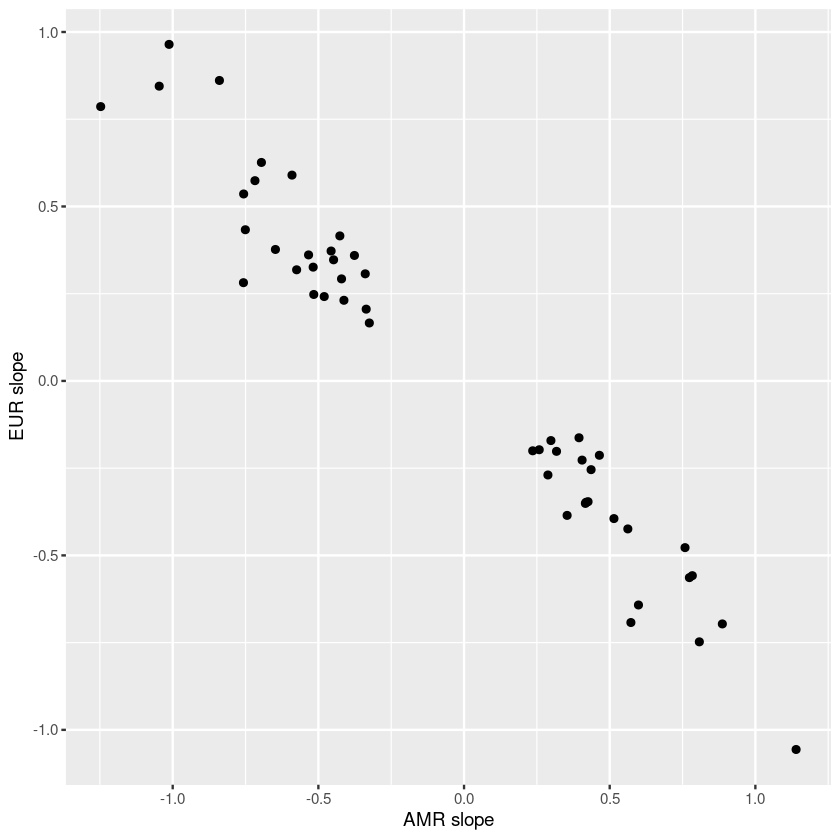

In [26]:
ggplot(reverse, aes(x = slope.x, y = slope.y)) +
geom_point() +
labs(x = "AMR slope", y = "EUR slope")

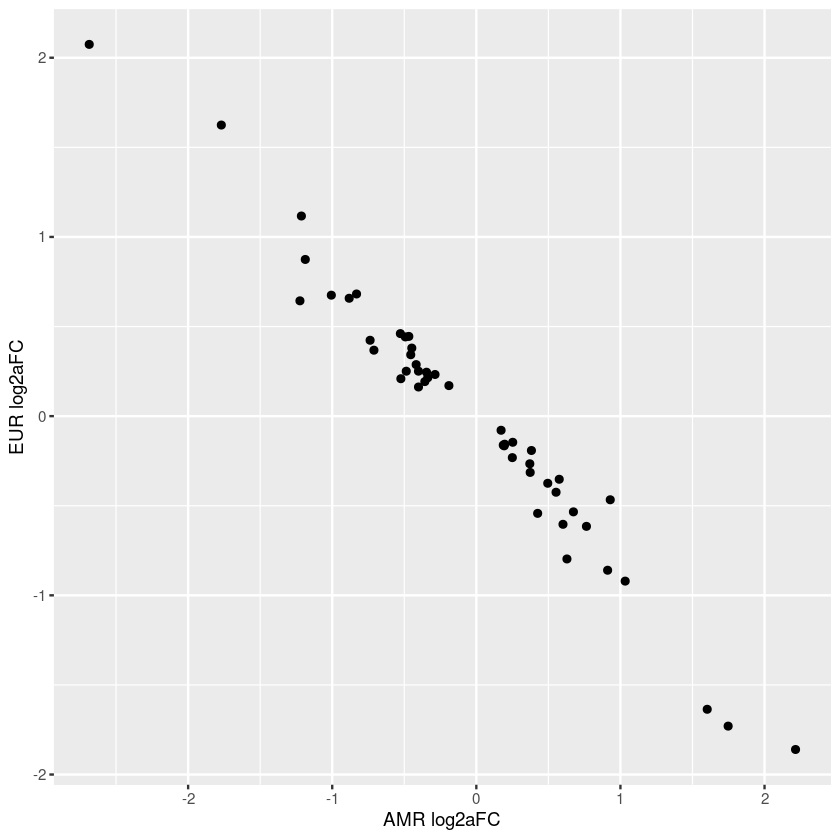

In [22]:
ggplot(reverse, aes(x = log2_aFC.x, y = log2_aFC.y)) +
geom_point() +
labs(x = "AMR log2aFC", y = "EUR log2aFC")

In [27]:
write.table(data.frame(unique(reverse$sid)), "../results/amr_nominal_15HCP/eur_amr_reverse_afc_sid.txt",
           col.names = F, row.names = F, quote = F, sep = "\t")

**Most off diagonal variants have filpped REF/ALT between EUR and AMR**
- `awk 'FNR==NR{a[$1]=$1; next}; $2 in a {print}' eur_amr_reverse_afc_sid.txt ~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.bim > reverse_sid_eur.txt`
- `awk 'FNR==NR{a[$1]=$1; next}; $2 in a {print}' eur_amr_reverse_afc_sid.txt ~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.bim > reverse_sid_amr.txt`
- the 6 unmatched alleles in populations, e.g. `chr16:75551646` somehow after `crossmap_ancestry` the allels were changed in AMR
- should have kept allele order

In [28]:
eur_sid <- read.table("../results/amr_nominal_15HCP/reverse_sid_eur.txt")
amr_sid <- read.table("../results/amr_nominal_15HCP/reverse_sid_amr.txt")

In [29]:
head(eur_sid)

,V1,V2,V3,V4,V5,V6
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,1,chr1:9255279,0,9315338,AT,A
2,1,rs11444006,0,46006185,GA,G
3,2,chr2:69559036,0,69786168,AT,A
4,2,chr2:74114301,0,74341428,C,CG
5,2,chr2:99183170,0,99799633,A,AG
6,2,chr2:134840738,0,135598308,T,TTTC


In [31]:
eur_amr_sid <- eur_sid %>% left_join(amr_sid, by = "V2")
head(eur_amr_sid)

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,chr1:9255279,0,9315338,AT,A,1,0,9315338,A,AT
2,1,rs11444006,0,46006185,GA,G,1,0,46006185,G,GA
3,2,chr2:69559036,0,69786168,AT,A,2,0,69786168,A,AT
4,2,chr2:74114301,0,74341428,C,CG,2,0,74341428,CG,C
5,2,chr2:99183170,0,99799633,A,AG,2,0,99799633,AG,A
6,2,chr2:134840738,0,135598308,T,TTTC,2,0,135598308,TTTC,T


In [32]:
dim(eur_amr_sid)
sum(eur_amr_sid$V5.x == eur_amr_sid$V6.y)
sum(eur_amr_sid$V6.x == eur_amr_sid$V5.y)

[1] 48 11

[1] 42

[1] 48

In [34]:
eur_amr_sid[which(eur_amr_sid$V5.x != eur_amr_sid$V6.y),]

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
13,6,rs111724671,0,167379637,AG,A,6,0,167379637,A,AT
21,10,rs35467653,0,16493210,TG,T,10,0,16493210,T,TC
31,15,rs35410548,0,45653572,CTG,C,15,0,45653572,C,CTA
36,16,rs35715610,0,4915699,AC,A,16,0,4915699,A,AG
39,16,chr16:75551646,0,75585544,TATC,T,16,0,75585544,T,TATG
41,17,rs60556815,0,15719798,CA,C,17,0,15719798,C,CT


**Reverse log2aFC for swapped alleles variants**

In [65]:
head(eur_amr_mac_10)

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,rs61769339,0,662622,A,G,1,0,662622,A,G
2,1,rs12238997,0,693731,G,A,1,0,693731,G,A
3,1,rs61769351,0,693823,C,G,1,0,693823,C,G
4,1,rs142559957,0,704637,A,G,1,0,704637,A,G
5,1,rs58276399,0,731718,C,T,1,0,731718,C,T
6,1,rs61770163,0,732032,C,A,1,0,732032,C,A


In [67]:
eur_amr_mac_10_swap <- eur_amr_mac_10 %>% filter(V5.x == V6.y, V6.x == V5.y)

In [68]:
dim(eur_amr_mac_10_swap)

[1] 19829    11

In [69]:
eur_amr_mac_10_consistent <- eur_amr_mac_10 %>% filter(V5.x == V5.y, V6.x == V6.y)
dim(eur_amr_mac_10_consistent)

[1] 4765942      11

In [70]:
nrow(eur_amr_mac_10_consistent) + nrow(eur_amr_mac_10_swap)
dim(eur_amr_mac_10)

[1] 4785771

[1] 4787693      11

In [71]:
# somehow after crossmap alleles were changed
head(eur_amr_mac_10 %>% filter(!V2 %in% eur_amr_mac_10_swap$V2, !V2 %in% eur_amr_mac_10_consistent$V2))

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,chr1:1193398,0,1128778,CTTA,C,1,0,1128778,C,CTGT
2,1,rs3835460,0,1494106,CA,C,1,0,1494106,C,CG
3,1,chr1:2461871,0,2393310,CA,C,1,0,2393310,C,CC
4,1,rs112957422,0,3745416,T,TAG,1,0,3745416,TAA,T
5,1,chr1:3868550,0,3785114,C,CG,1,0,3785114,CT,C
6,1,rs35048278,0,5347955,GC,G,1,0,5347955,G,GA


In [72]:
head(amr_eur_mac_10)

,gene_qtl,pid.x,sid.x,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000272438:rs61769717,ENSG00000272438,rs61769717,0.6334069,0.4391346,0.8214064,0.41410685,0.26259194,0.55856935,EUR nominal eQTL
2,ENSG00000230699:rs61769717,ENSG00000230699,rs61769717,0.7455732,0.4833001,0.9368429,0.55541610,0.40213786,0.69706018,EUR nominal eQTL
3,ENSG00000217801:rs3813193,ENSG00000217801,rs3813193,0.8512290,0.6679700,0.9712718,0.37343057,0.20501898,0.55611407,EUR non-significant
4,ENSG00000131591:chr1:1094425,ENSG00000131591,chr1:1094425,-0.3325752,-0.4021713,-0.2483359,-0.17406770,-0.30550417,-0.10935300,EUR nominal eQTL
5,ENSG00000176022:rs111614456,ENSG00000176022,rs111614456,-0.4766200,-0.5980982,-0.3991216,-0.38939210,-0.45091010,-0.33342093,EUR nominal eQTL
6,ENSG00000221978:rs116579103,ENSG00000221978,rs116579103,0.4695129,0.3370949,0.6037550,-0.02065644,-0.08420039,0.03797308,EUR non-significant


In [73]:
for (i in 1:nrow(amr_eur_mac_10)) {
    if (amr_eur_mac_10[i,'sid.x'] %in% eur_amr_mac_10_swap$V2) {
        amr_eur_mac_10[i,'log2_aFC.y'] <- -amr_eur_mac_10[i,'log2_aFC.y']
        amr_eur_mac_10[i,'log2_aFC_lower.y'] <- -amr_eur_mac_10[i,'log2_aFC_lower.y']
        amr_eur_mac_10[i,'log2_aFC_upper.y'] <- -amr_eur_mac_10[i,'log2_aFC_upper.y']
    }
}

In [74]:
sum(amr_eur_mac_10$sid.x %in% eur_amr_mac_10_swap$V2)

[1] 55

`geom_smooth()` using formula 'y ~ x'



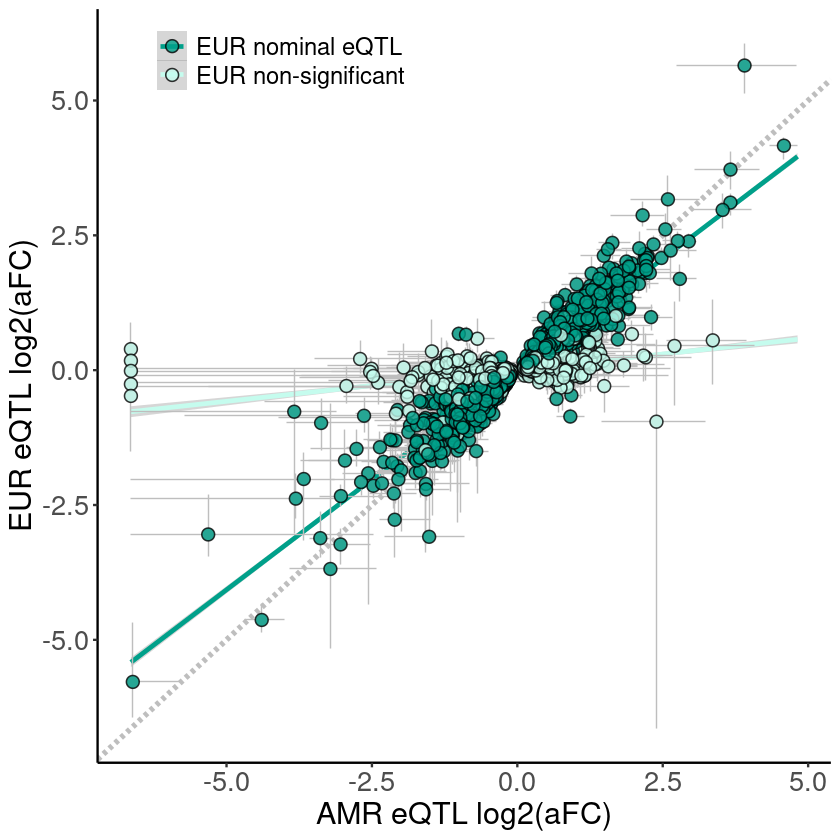

In [76]:
ggplot(amr_eur_mac_10, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "") +
    scale_x_continuous(breaks=seq(-5,5,2.5)) +
    scale_y_continuous(breaks=seq(-5,5,2.5))

### 2-2: AFR-EUR

In [35]:
afr <- afr %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)
afr_afc <- afr_afc %>% unite("gene_qtl", pid, sid, sep = ":")
sum(unique(afr$gene_qtl) %in% unique(afr_afc$gene_qtl)) # all perm eQTL are nom sig
length(unique(afr$gene_qtl))

[1] 1876

[1] 1876

In [36]:
afr_afc <- afr_afc %>% filter(gene_qtl %in% afr$gene_qtl)
dim(afr_afc)

[1] 1876   10

In [37]:
eur_afc_all_afr <- eur_afc_all %>% filter(gene_qtl %in% afr_afc$gene_qtl)
dim(eur_afc_all_afr)

[1] 1350    6

In [38]:
eur_afc_all_afr <- eur_afc_all_afr %>% mutate(sig = ifelse(gene_qtl %in% eur_afc_sig$gene_qtl,
                                                           "EUR nominal eQTL", "EUR non-significant"))
table(eur_afc_all_afr$sig)


   EUR nominal eQTL EUR non-significant 
                857                 493 

In [39]:
afr_eur <- afr_afc %>% 
select(gene_qtl, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>%
inner_join(eur_afc_all_afr, by = "gene_qtl") %>% 
select(gene_qtl, log2_aFC.x, log2_aFC_lower.x, log2_aFC_upper.x, 
       log2_aFC.y, log2_aFC_lower.y, log2_aFC_upper.y, sig)

cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
afr_eur[cols.num] <- sapply(afr_eur[cols.num],as.numeric)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 21 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


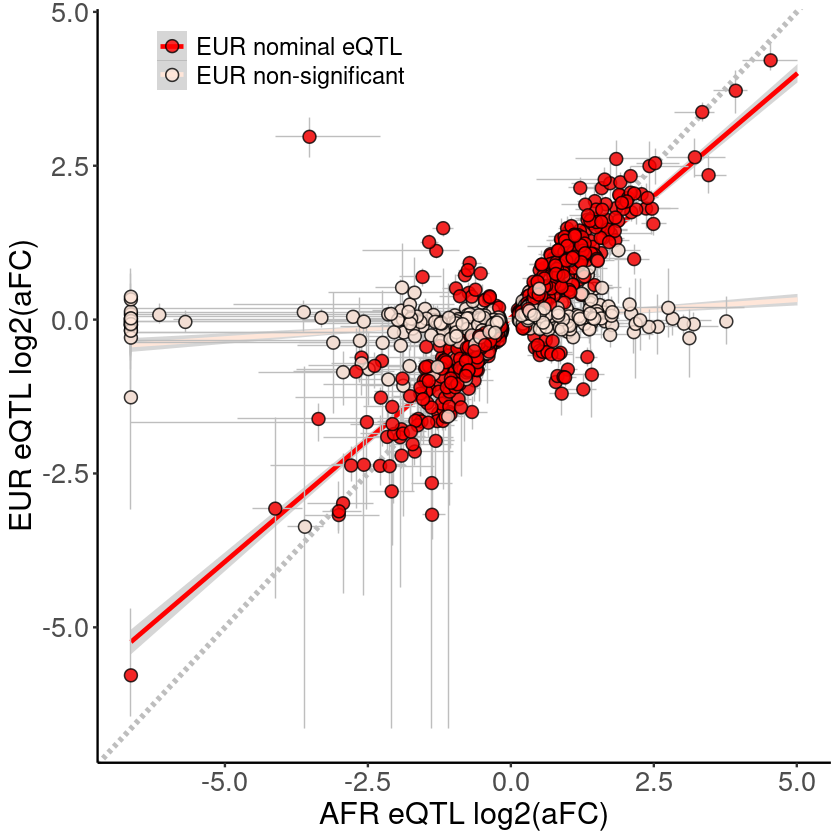

In [46]:
cols <- c("EUR nominal eQTL" = "#FF0000",
          "EUR non-significant" = "#FFE6D9")

ggplot(afr_eur, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AFR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [47]:
ggsave("../figures/aFC_afr_eur.pdf", width = 6, height = 6)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 21 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


In [60]:
cor.test(x = afr_eur$log2_aFC.x, y = afr_eur$log2_aFC.y, method = 'spearman')


	Spearman's rank correlation rho

data:  afr_eur$log2_aFC.x and afr_eur$log2_aFC.y
S = 13127748, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8735355 


In [40]:
reverse <- afr_eur %>% filter(log2_aFC.x * log2_aFC.y < 0, sig == "EUR nominal eQTL")
reverse <- reverse %>% left_join(afr, by = "gene_qtl") %>% left_join(eur_afc_sig, by = "gene_qtl")

In [42]:
write.table(data.frame(unique(reverse$sid)), "../results/eur_nominal_50HCP/eur_afr_reverse_afc_sid.txt",
           col.names = F, row.names = F, quote = F, sep = "\t")

In [43]:
eur_sid <- read.table("../results/afr_nominal_25HCP/reverse_sid_eur.txt")
afr_sid <- read.table("../results/afr_nominal_25HCP/reverse_sid_afr.txt")

In [44]:
eur_afr_sid <- eur_sid %>% left_join(afr_sid, by = "V2")
dim(eur_afr_sid)
sum(eur_afr_sid$V5.x == eur_afr_sid$V6.y)
sum(eur_afr_sid$V6.x == eur_afr_sid$V5.y)

[1] 45 11

[1] 42

[1] 45

### 2-3: Add non-sig to EUR aFC
- Make aFC QTL input file for EUR, all AMR, AFR permutation eQTL. Then can filter for EUR nominal eQTL by matching with EUR significant_assoc file. Also need to remove variants that are not in EUR
- check if aFC are the same as previous run (update: yes. CI is slightly different)

In [20]:
df <- rbind(amr, afr)

In [21]:
dim(df)
length(unique(df$gene_qtl))

[1] 5118   14

[1] 4951

In [22]:
df <- df %>% select(gene_qtl, pid, sid)
df <- df[!duplicated(df$gene_qtl),]
dim(df)

[1] 4951    3

In [14]:
eur_bim <- fread("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.bim", data.table = F)
head(eur_bim)
head(df)

,V1,V2,V3,V4,V5,V6
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,1,rs61769339,0,662622,A,G
2,1,rs12238997,0,693731,G,A
3,1,rs61769351,0,693823,C,G
4,1,rs142559957,0,704637,A,G
5,1,rs58276399,0,731718,C,T
6,1,rs61770163,0,732032,C,A


,gene_qtl,pid,sid
,<chr>,<chr>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567
4,ENSG00000001630:rs12531966,ENSG00000001630,rs12531966
5,ENSG00000002016:rs147560086,ENSG00000002016,rs147560086
6,ENSG00000002549:chr4:17605580,ENSG00000002549,chr4:17605580


In [23]:
length(unique(df$sid))

[1] 4746

In [74]:
sum(unique(df$sid) %in% eur_bim$V2)

[1] 3763

In [24]:
test <- df %>% inner_join(eur_bim, by = c("sid"="V2"))
dim(test)

[1] 3933    8

In [25]:
df <- df %>% left_join(eur_bim, by = c("sid"="V2"))
head(df)

,gene_qtl,pid,sid,V1,V3,V4,V5,V6
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636,1,0,169807621,C,T
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213,1,0,24741819,G,A
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567,1,0,24711120,C,G
4,ENSG00000001630:rs12531966,ENSG00000001630,rs12531966,7,0,91765840,G,A
5,ENSG00000002016:rs147560086,ENSG00000002016,rs147560086,12,0,1054956,T,C
6,ENSG00000002549:chr4:17605580,ENSG00000002549,chr4:17605580,4,0,17607203,TA,T


In [26]:
length(unique(df$sid))

[1] 4746

In [18]:
sum(complete.cases(df))

[1] 3933

In [27]:
df <- df[complete.cases(df),]
dim(df)
length(unique(df$gene_qtl))
length(unique(df$sid))

[1] 3933    8

[1] 3933

[1] 3763

In [28]:
df <- df %>% select(pid, sid, V1, V4)
colnames(df)[3:4] <- c("sid_chr", "sid_pos")
head(df)

,pid,sid,sid_chr,sid_pos
,<chr>,<chr>,<int>,<int>
1,ENSG00000000460,rs12064636,1,169807621
2,ENSG00000001460,rs4592213,1,24741819
3,ENSG00000001461,rs527567,1,24711120
4,ENSG00000001630,rs12531966,7,91765840
5,ENSG00000002016,rs147560086,12,1054956
6,ENSG00000002549,chr4:17605580,4,17607203


In [29]:
write.table(df, "../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC.txt", col.names = T, row.names = F, quote = F, sep = "\t")

### Supp: Deming regression on ancestry permutation top gene-SNP pair

In [12]:
eur_all <- fread("../results/eur_perm_50HCP/all_assoc.txt.gz", data.table = F)
amr_all <- fread("../results/amr_perm_15HCP/all_assoc.txt.gz", data.table = F)
afr_all <- fread("../results/afr_perm_25HCP/all_assoc.txt.gz", data.table = F)

In [13]:
head(eur_all)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,5511,1.02361,969.063,201.252,rs6013263,772733,5.67318e-07,-0.225337,0.00109989,1.49925e-03,6.78657e-03,1.92268e-05
2,ENSG00000000457,5826,1.02416,496.138,198.771,rs151002214,-556686,2.45491e-03,0.393414,0.86218800,8.63017e-01,4.69488e-01,3.76433e-05
3,ENSG00000000460,6010,1.04584,437.692,189.943,chr1:169823752,161648,2.24561e-11,-0.273676,0.00009999,1.20474e-07,1.21321e-06,4.68139e-05
4,ENSG00000000938,3201,1.04246,338.635,195.447,rs6662288,85657,1.14166e-04,-0.839906,0.07739230,8.19255e-02,1.49745e-01,5.96522e-05
5,ENSG00000000971,3270,1.04679,341.251,196.116,rs518572,42348,2.48783e-04,0.888759,0.15911600,1.57249e-01,2.14287e-01,6.02822e-05
6,ENSG00000001036,4203,1.07172,567.161,192.080,rs6932032,-263653,4.18257e-04,-0.615228,0.40460800,4.00668e-01,3.32981e-01,4.01755e-05


In [17]:
eur_all <- eur_all %>% unite("gene_snp", pid, sid, sep = ":", remove = FALSE)
amr_all <- amr_all %>% unite("gene_snp", pid, sid, sep = ":", remove = FALSE)
afr_all <- afr_all %>% unite("gene_snp", pid, sid, sep = ":", remove = FALSE)

In [18]:
sum(unique(eur_all$gene_snp) %in% unique(amr_all$gene_snp))

[1] 414

In [19]:
eur_amr <- eur_all %>% inner_join(amr_all, by = "gene_snp")

In [24]:
# calculate se of slope
eur_amr$se.x <- eur_amr$se.y <- NA
for(i in 1:nrow(eur_amr)) {
    if(eur_amr[i,'slope.x'] < 0) {
        zscore.x <- qnorm(eur_amr[i,'npval.x']/2)
    } else {
        zscore.x <- qnorm(1 - eur_amr[i,'npval.x']/2)
    }
    if (zscore.x != 0) {
        eur_amr[i,'se.x'] <- eur_amr[i,'slope.x']/zscore.x
    } else {
        eur_amr[i,'se.x'] <- NA
    }
    
    if(eur_amr[i,'slope.y'] < 0) {
        zscore.y <- qnorm(eur_amr[i,'npval.y']/2)
    } else {
        zscore.y <- qnorm(1 - eur_amr[i,'npval.y']/2)
    }
    if (zscore.y != 0) {
        eur_amr[i,'se.y'] <- eur_amr[i,'slope.y']/zscore.y
    } else {
        eur_amr[i,'se.y'] <- NA
    }
}

In [32]:
# remove se=0 pairs
eur_amr_filter <- eur_amr %>% filter(se.x != 0, se.y != 0)
dim(eur_amr_filter)

[1] 321  29

In [34]:
eur_amr_fit <- deming(slope.y ~ slope.x, data = eur_amr_filter, xstd = se.x, ystd = se.y)
print(eur_amr_fit)


Call:
deming(formula = slope.y ~ slope.x, data = eur_amr_filter, xstd = se.x,     ystd = se.y)

n= 321
                Coef   se(coef)  lower 0.95 upper 0.95
Intercept 0.01539939 0.01360671 -0.01126928 0.04206805
Slope     1.17692954 0.01950455  1.13870132 1.21515775

   Scale= 1.926775 


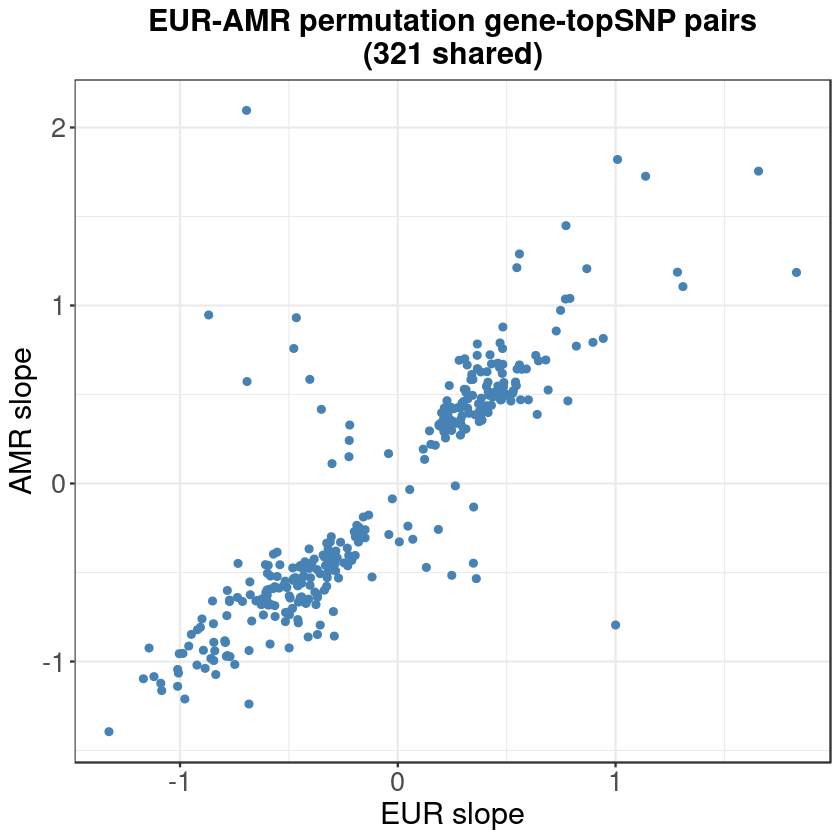

In [42]:
p <- ggplot(eur_amr_filter, aes(x = slope.x, y = slope.y)) +
    geom_point(color = "steelblue") +
    labs(x = "EUR slope", y = "AMR slope", title = "EUR-AMR permutation gene-topSNP pairs\n(321 shared)") +
    theme_bw() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
p

In [36]:
eur_afr <- eur_all %>% inner_join(afr_all, by = "gene_snp")
eur_afr$se.x <- eur_afr$se.y <- NA
for(i in 1:nrow(eur_afr)) {
    if(eur_afr[i,'slope.x'] < 0) {
        zscore.x <- qnorm(eur_afr[i,'npval.x']/2)
    } else {
        zscore.x <- qnorm(1 - eur_afr[i,'npval.x']/2)
    }
    if (zscore.x != 0) {
        eur_afr[i,'se.x'] <- eur_afr[i,'slope.x']/zscore.x
    } else {
        eur_afr[i,'se.x'] <- NA
    }
    
    if(eur_afr[i,'slope.y'] < 0) {
        zscore.y <- qnorm(eur_afr[i,'npval.y']/2)
    } else {
        zscore.y <- qnorm(1 - eur_afr[i,'npval.y']/2)
    }
    if (zscore.y != 0) {
        eur_afr[i,'se.y'] <- eur_afr[i,'slope.y']/zscore.y
    } else {
        eur_afr[i,'se.y'] <- NA
    }
}

# remove se=0 pairs
eur_afr_filter <- eur_afr %>% filter(se.x != 0, se.y != 0)
dim(eur_afr_filter)

[1] 176  29

In [37]:
eur_afr_fit <- deming(slope.y ~ slope.x, data = eur_afr_filter, xstd = se.x, ystd = se.y)
print(eur_afr_fit)


Call:
deming(formula = slope.y ~ slope.x, data = eur_afr_filter, xstd = se.x,     ystd = se.y)

n= 176
                Coef   se(coef) lower 0.95 upper 0.95
Intercept 0.06177621 0.01900151 0.02453394 0.09901848
Slope     1.12116907 0.02848731 1.06533497 1.17700318

   Scale= 1.93142 


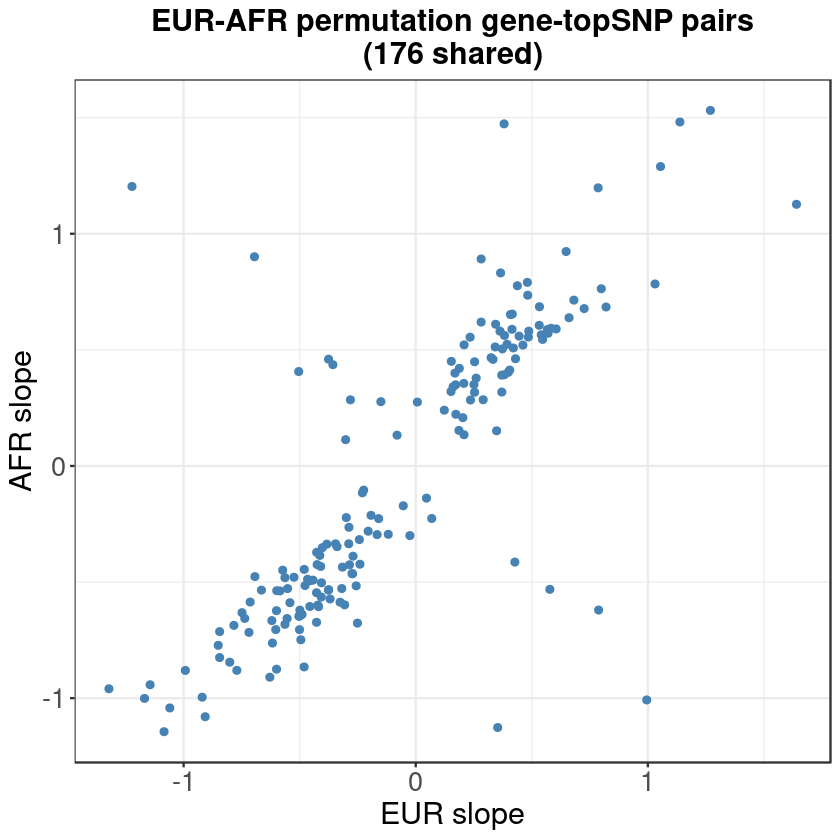

In [43]:
p <- ggplot(eur_afr_filter, aes(x = slope.x, y = slope.y)) +
    geom_point(color = "steelblue") +
    labs(x = "EUR slope", y = "AFR slope", title = "EUR-AFR permutation gene-topSNP pairs\n(176 shared)") +
    theme_bw() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
p

In [44]:
amr_afr <- amr_all %>% inner_join(afr_all, by = "gene_snp")
amr_afr$se.x <- amr_afr$se.y <- NA
for(i in 1:nrow(amr_afr)) {
    if(amr_afr[i,'slope.x'] < 0) {
        zscore.x <- qnorm(amr_afr[i,'npval.x']/2)
    } else {
        zscore.x <- qnorm(1 - amr_afr[i,'npval.x']/2)
    }
    if (zscore.x != 0) {
        amr_afr[i,'se.x'] <- amr_afr[i,'slope.x']/zscore.x
    } else {
        amr_afr[i,'se.x'] <- NA
    }
    
    if(amr_afr[i,'slope.y'] < 0) {
        zscore.y <- qnorm(amr_afr[i,'npval.y']/2)
    } else {
        zscore.y <- qnorm(1 - amr_afr[i,'npval.y']/2)
    }
    if (zscore.y != 0) {
        amr_afr[i,'se.y'] <- amr_afr[i,'slope.y']/zscore.y
    } else {
        amr_afr[i,'se.y'] <- NA
    }
}

# remove se=0 pairs
amr_afr_filter <- amr_afr %>% filter(se.x != 0, se.y != 0)
dim(amr_afr_filter)

[1] 216  29

In [45]:
amr_afr_fit <- deming(slope.y ~ slope.x, data = amr_afr_filter, xstd = se.x, ystd = se.y)
print(amr_afr_fit)


Call:
deming(formula = slope.y ~ slope.x, data = amr_afr_filter, xstd = se.x,     ystd = se.y)

n= 216
                Coef   se(coef)  lower 0.95 upper 0.95
Intercept 0.03947091 0.02568592 -0.01087256 0.08981438
Slope     0.97494504 0.02525263  0.92545081 1.02443928

   Scale= 2.270224 


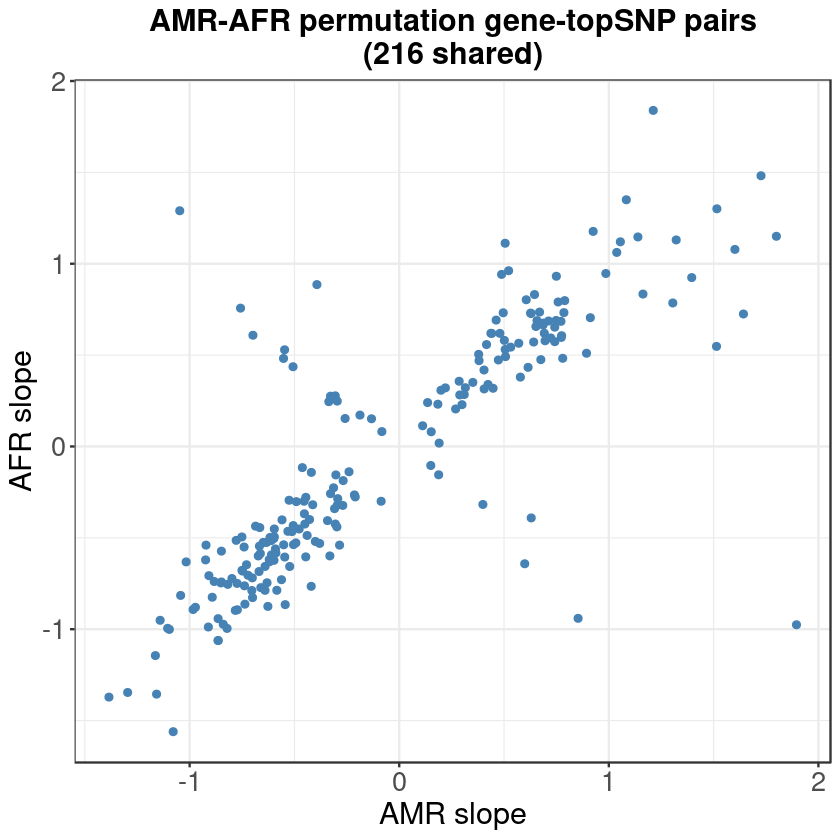

In [46]:
p <- ggplot(amr_afr_filter, aes(x = slope.x, y = slope.y)) +
    geom_point(color = "steelblue") +
    labs(x = "AMR slope", y = "AFR slope", title = "AMR-AFR permutation gene-topSNP pairs\n(216 shared)") +
    theme_bw() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5))
p

### 3: Replication
TODO transfer from eqtl.ipynb